# Homework 1 (Machine Learning for signal processing)

## Readme part

The program has been tested under Linux, MacOS and Windows with python 3. Due to the sample '<' and '>' have special meaning in unix system. The `input()` function is applied as user interaction part rather than `argparse`. So you can simply run `python DataEmit.py` and `python PLA.py`. It will ask you to input the params as shown in the PDF. 

The DataEmit.py will print *Create datapoint program finished* when it finished correctly, otherwise it will show *Input with wrong format*. The output file is called "train.txt" and the format is (x, y, 1/-1). The first two column indicate the coordinate of the point and the last column is the label: 1 stands for positive point and -1 stands for negitive point.

For example, when you want to use DataEmit.py, your command line may look like the following:
```
> python DataEmit.py
DataEmit<0,-1,1> 5 4
Create datapoint program finished

> python DataEmit.py
DataEmit<0,-1,1> 54
Input with wrong format
```
**Noted**: Since the program only generate point in domain [-10, 10], please make sure your input line<w0, w1, w2> is suitable.


The PLA.py always takes train.txt as input, but due to PDF, you need to type it on your command line by yourself. When it finished correctly, it plots the figure with PLA result on the screen.

For example, when you want to use PLA.py, your command line may look like the following:
```
> python PLA.py
PLA train.txt
<Figure>
PLA result: <w0, w1, w2>
```

## Progam part

### Program one (DataEmit.py)

In [6]:
%matplotlib inline
import numpy as np
import re

def create_datapoint(params):
    """
    Input: 
        params: <w0, w1, w2> pos_num neg_num
    """
    try:
        # Read in params from input
        w0 = float(params[1])
        w1 = float(params[2])
        w2 = float(params[3])
        pos_num = int(params[5])
        neg_num = int(params[6])
    except:
        print("Input with wrong format")
        return
    else:
        # Initialize the line
        line = np.array([w1, w2 ,w0])
        
    
    
    
    
    # Create dataset
    pos_cnt = 0
    neg_cnt = 0
    pos_point = []
    neg_point = []
    while(pos_cnt < pos_num or neg_cnt < neg_num):
        point = np.round(np.random.random(2)*20-10, 2)
        vec = np.append(point, 1)
        val = np.sign(vec.dot(line))

        if val < 0 and neg_cnt < neg_num:
            neg_point.append(point)
            neg_cnt += 1

        elif val > 0 and pos_cnt < pos_num:
            pos_point.append(point)
            pos_cnt += 1
    
    # Add label to the dataset
    pos_point = np.array(pos_point)
    pos_label = np.zeros(pos_num)+1
    pos = np.c_[pos_point, pos_label]

    neg_point = np.array(neg_point)
    neg_label = np.zeros(neg_num)-1
    neg = np.c_[neg_point, neg_label]
    
    train = np.concatenate((pos, neg), axis=0)
    
    # Save the dataset
    np.savetxt("train.txt", train, delimiter=",", fmt='%.2f')
    print("Create datapoint program finished")






if __name__ == '__main__':
    string = input("DataEmit")
    params = re.split(r'[<,>\s]', string)
    
    create_datapoint(params)
    

DataEmit<0,-1,1> 5 4
Create datapoint program finished


### Program two (PLA.py)

PLA train.txt


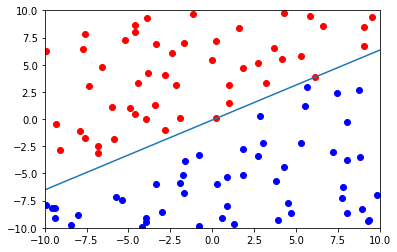

PLA result: <2.1105262681424364,-14.869508255536493,23.143395805677336>


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def pla(feature, label):
    """
    params:
        feature: (x, y) of the point
        label: (+, -) of the point
    output:
        w: the line
    """
    
    w = np.random.uniform(-1,1,size=3)

    # Training part
    flag = 0
    while(flag == 0):
        flag = 1
        for i in range(len(feature)):
            vec = np.append(feature[i], 1)
            y = np.sign(vec.dot(w))

            if label[i] != y:
                w = w + label[i]*vec
                flag = 0
    return w

def plot(w, data):
    """
    params: 
        w: params of line
        data: dataset
    """
    label = data[:, -1]
    
    x = np.arange(-10, 10, 0.01)
    y = (w[0] * x + w[2]) / (-w[1])
    pos_idx = np.where(label == 1)
    neg_idx = np.where(label == -1)

    pos_data = data[pos_idx]
    neg_data = data[neg_idx]
    plt.scatter(pos_data[:, 0], pos_data[:, 1], color='red')
    plt.scatter(neg_data[:, 0], neg_data[:, 1], color='blue')
    plt.plot(x, y)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

    print("PLA result: <" + str(w[2]) + "," + str(w[0]) + "," + str(w[1]) + ">")

if __name__ == '__main__':
    file_name = input("PLA ")
    data = np.genfromtxt(file_name, delimiter=',')
    feature = data[:, :-1] 
    label = data[:, -1]
    w = pla(feature, label)
    
    plot(w, data)
    
    

# Report part

### Testing with four examples

1. DataEmit<5,2,3> 10 10
2. DataEmit<5,2,3> 50 50
3. DataEmit<5,2,3> 100 100
4. DataEmit<5,2,3> 150 150

* Test one: DataEmit<5,2,3> 10 10

DataEmit<5,2,3> 10 10
PLA train.txt


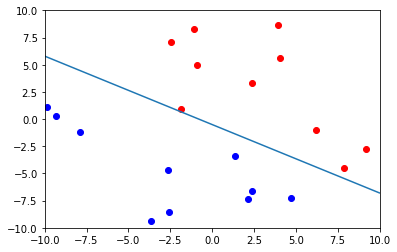

PLA result: <2.605274582574163,3.2659531729434024,5.1903703670188355>


In [7]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test two: DataEmit<5,2,3> 50 50

DataEmit<5,2,3> 50 50
PLA train.txt


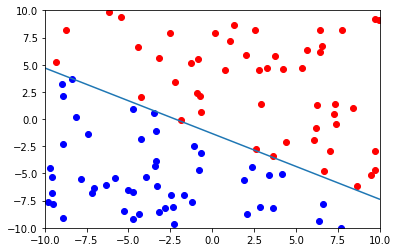

PLA result: <19.274684358801373,8.743191949277456,14.486227970111472>


In [8]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test three: DataEmit<5,2,3> 100 100

DataEmit<5,2,3> 100 100
PLA train.txt


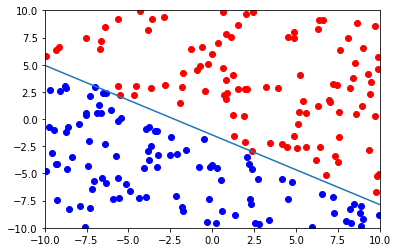

PLA result: <109.80238311068848,48.32633584889078,75.50079265378834>


In [9]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test four: DataEmit<5,2,3> 150 150

DataEmit<5,2,3> 150 150
PLA train.txt


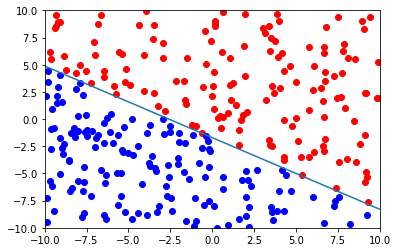

PLA result: <50.76743225868358,19.625121412505596,29.820913681231843>


In [10]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test five: DataEmit<5,2,3> 200 200

DataEmit<5,2,3> 200 200
PLA train.txt


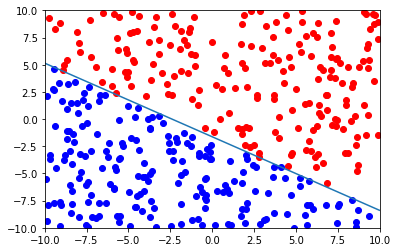

PLA result: <69.29742365593805,28.897487602663702,42.698520732875664>


In [11]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

### Result

As the results shown above, it's clear that when we enlarge the size of the training data, the PLA line will become closer to the given one (5, 2, 3). This because when we create the dataset, we use (5, 2, 3) to judge whether the point is negative or positive. And along with the size of the training data increase, more generated random data point will be close to (5, 2, 3). Although the PLA result returned from the program seems totally different, but after normalization, they are close. So PLA will be strict to this line with the number of data point increased.

# Experiment with my own vector W

W = (1, -2, 3)

### Increse the training data

In this part, I set up four test:
1. Test one: DataEmit<1,-2,3> 10 10
2. Test two: DataEmit<1,-2,3> 50 50
3. Test three:DataEmit<1,-2,3> 150 150
4. Test three:DataEmit<1,-2,3> 250 250

And the results are shown below. And it also prove the aforementioned conclusion

* Test one: DataEmit<1,-2,3> 10 10

DataEmit<1,-2,3> 10 10
PLA train.txt


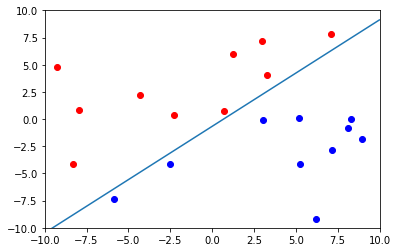

PLA result: <8.577939181707384,-12.537048373024735,12.796592864182102>


In [16]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test two: DataEmit<1,-2,3> 50 50

DataEmit<1,-2,3> 50 50
PLA train.txt


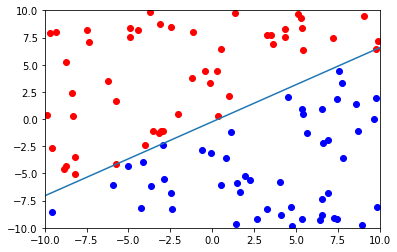

PLA result: <18.05819668155146,-49.031567762820835,71.9911753985573>


In [17]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test three:DataEmit<1,-2,3> 150 150

DataEmit<1,-2,3> 150 150
PLA train.txt


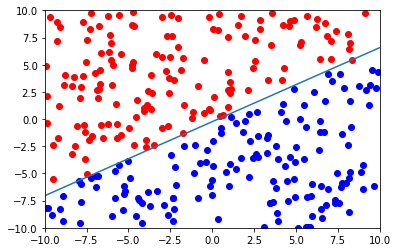

PLA result: <7.6616444110348905,-21.460090535848348,31.527737662984244>


In [19]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test three:DataEmit<1,-2,3> 250 250

DataEmit<1,-2,3> 250 250
PLA train.txt


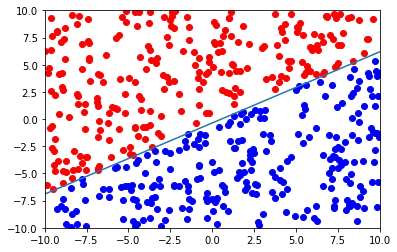

PLA result: <19.217423523331846,-34.711126777581825,53.07305552637945>


In [20]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

### Change the ratio of the two labels in the training data

In this part, I design three test to show whether the ratio of the two labels in the training data will influence the PLA result.

1. Test one: DataEmit<1,-2,3> 50 50
2. Test two: DataEmit<1,-2,3> 50 150
3. Test three: DataEmit<1,-2,3> 50 250

And as we can see below, we cannot draw any conclusion, since the point are generated randomly and we only run it one time. But theoretically. the line should be shifted to the label with less data points I suppose.

* Test one: DataEmit<1,-2,3> 50 50

DataEmit<1,-2,3> 50 50
Create datapoint program finished
PLA train.txt


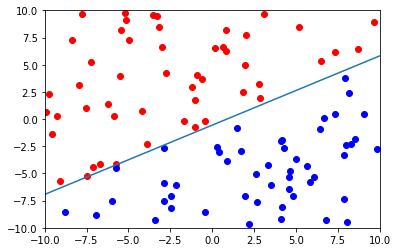

PLA result: <7.244884826801699,-8.206216479023585,12.891098007761508>


In [9]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test two: DataEmit<1,-2,3> 50 150

DataEmit<1,-2,3> 50 150
PLA train.txt


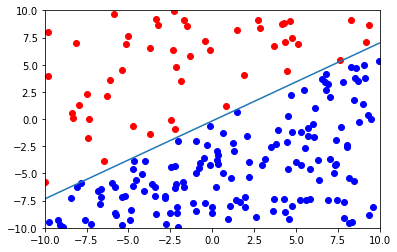

PLA result: <2.4016915486042585,-9.7828008555535,13.643342950630508>


In [23]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)

* Test two: DataEmit<1,-2,3> 50 250

DataEmit<1,-2,3> 50 250
PLA train.txt


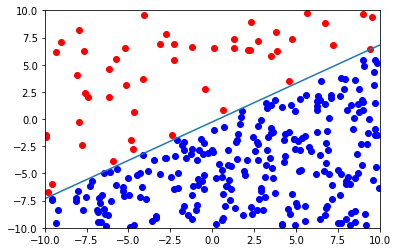

PLA result: <6.334226551635883,-16.833967139194733,23.819402557394508>


In [27]:
string = input("DataEmit")
params = re.split(r'[<,>\s]', string)
create_datapoint(params)
file_name = input("PLA ")
data = np.genfromtxt(file_name, delimiter=',')
feature = data[:, :-1] 
label = data[:, -1]
w = pla(feature, label)
plot(w, data)